<a href="https://colab.research.google.com/github/jtrussell10/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [3]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
# Add a column counting how many "features" an apartment has.

#Isolate DF to boolean columns
df2 = df.iloc[:,10:60]

#Count sum of row
sum = df2.sum(axis=1)

#Add sum to original df
df['am'] = sum 
df.head()


In [146]:
df['am2'] = df['am'] - 2* df['pre-war']

In [158]:
import math

In [190]:
d = {'low':1,'medium':2,'high':3}

df['interest_level'] = df['interest_level'].map(d)

In [256]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,am,rooms,attitude,am2,lat_dist,long_dist,distance,length
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5,-3010.531916,0,-0.0064,0.0582,0.0646,588.0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3.0,-3017.449336,5,0.0738,0.0340,0.1078,8.0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0,-3014.744530,3,0.0179,-0.0011,0.0190,691.0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,-3014.472249,2,0.0330,0.0330,0.0660,492.0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.0,-3018.913618,-1,0.1032,0.0514,0.1546,479.0


In [278]:
df['length'] = df['description'].str.len() 

In [295]:
df['length'] = df['length'].fillna(0)
df['length']=df['length']**(1/2)


In [223]:

df['rooms']=df['bedrooms']+df['bathrooms']
df['lat_dist'] = df['latitude'] - 40.7209
df['long_dist'] = df['longitude'] + 74.0007
df['distance'] = df['long_dist'].abs() + df['lat_dist'].abs()


In [296]:
y = df['price']
X = df[['rooms',
        'am2','latitude','longitude','distance','interest_level', 'length']]

print(y.shape)
print(X.shape)

(48817,)
(48817, 7)


In [86]:
df['created'] =  pd.to_datetime(df['created'], infer_datetime_format=True)

In [297]:
cutoff = '2016-06-01 00:00:00'
mask = df.created < '2016-06-01 00:00:00'
X_train, y_train = X.loc[mask], y.loc[mask]
X_val, y_val = X.loc[~mask], y.loc[~mask]
train = df.loc[mask]
test = df.loc[~mask]

In [263]:
col = 'rooms'

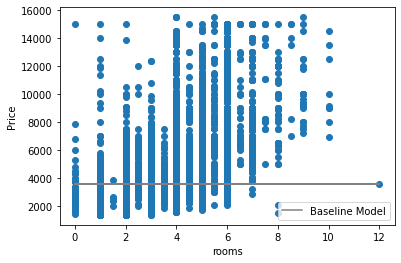

In [264]:

y_pred = [y_train.mean()]*len(X_train)

plt.scatter(X_train[col], y_train)
plt.plot(X_train[col], 
         y_pred, 
         color='grey', 
         label='Baseline Model')
plt.xlabel(col)
plt.ylabel('Price')
plt.legend();

In [246]:

from sklearn.linear_model import LinearRegression
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Baseline MAE: 1201.8811133682555


In [247]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train[[col]], y_train)


y_pred = model.predict(X_train[[col]])

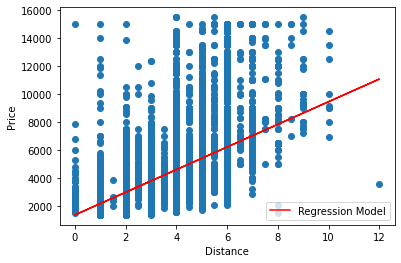

In [248]:

plt.scatter(X_train[col], y_train)
plt.plot(X_train[col], 
         y_pred, 
         color='red',
         label='Regression Model')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.legend();

In [265]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train[[col]])))
print('Validation MAE:', mean_absolute_error(y_val, model.predict(X_val[[col]])))

Training MAE: 893.9571083669464
Validation MAE: 910.5114580130397


In [266]:
from sklearn.metrics import mean_squared_error

print('Training RMSE:', mean_squared_error(y_train, model.predict(X_train[[col]]), squared=False))
print('Validation RMSE:', mean_squared_error(y_val, model.predict(X_val[[col]]), squared=False))

Training RMSE: 1340.9059153962985
Validation RMSE: 1340.2520501052502


In [267]:
from sklearn.metrics import r2_score

print('Training R2:', model.score(X_train[[col]], y_train))
print('Validation R2:', model.score(X_val[[col]], y_val))

Training R2: 0.420930005213961
Validation R2: 0.4220517161864745


In [298]:

model2 = LinearRegression()

model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
print('Training R2:', model2.score(X_train, y_train))
print('Verification R2:', model2.score(X_val, y_val))

Training R2: 0.5784161232157644
Verification R2: 0.5877352742640083


In [300]:
print('Training MAE:', mean_absolute_error(y_train, model2.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model2.predict(X_val)))

Training MAE: 718.9105663130391
Validation MAE: 722.6365458120216
